In [1]:
! python --version

Python 3.7.6


In [2]:
from clusters import *
from os import listdir
from os.path import isfile, join
from operator import itemgetter
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

import cdlib
from cdlib.algorithms import louvain
from cdlib import evaluation

import numpy as np
from tqdm import tqdm

In [3]:
amazon = 'amazon/com-amazon.ungraph.txt'
email = 'email/email-Eu-core.txt'
dblp = 'dblp/com-dblp.ungraph.txt'
wikipedia = 'wikipedia/wiki-topcats.txt'
youtube = 'youtube/com-youtube.ungraph.txt'

in_path = '../../stream_graph_data/networks_ground_truth_communities/'

### Build Email Graph

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
Network density: 0.03311331787278746


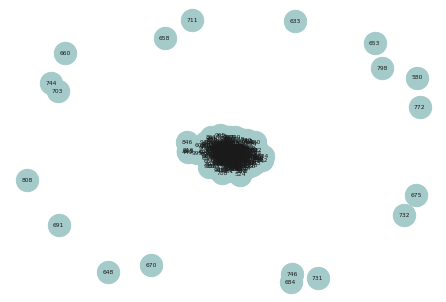

In [125]:
with open(in_path + email) as f:
    edges = f.readlines()
    edges = [tuple(line.strip().split(' ')) for line in edges]
    edges = [(int(x[0]), int(x[1])) for x in edges]
    
graph = nx.Graph()
graph.add_edges_from(edges)

nx.draw(graph, with_labels=True, node_color='#A4CACA', figsize=(500,500), node_size=500, font_size=6)

print(nx.info(graph))
print("Network density:", nx.density(graph))

### Build Youtube Graph

In [4]:
with open(in_path + youtube) as f:
    edges = f.readlines()[4:]
    edges = [tuple(line.strip().split('\t')) for line in edges]
    edges = [(int(x[0]), int(x[1])) for x in edges]
    
graph = nx.Graph()
graph.add_edges_from(edges)

# nx.draw(graph, with_labels=True, node_color='red', figsize=(50,50), node_size=500

print(nx.info(graph))
print("Network density:", nx.density(graph))

Name: 
Type: Graph
Number of nodes: 1134890
Number of edges: 2987624
Average degree:   5.2650
Network density: 4.639260713241579e-06


### Build Wikipedia Graph

In [ ]:
with open(in_path + wikipedia) as f:
    edges = f.readlines()[4:]
    edges = [tuple(line.strip().split('\t')) for line in edges]
    edges = [(int(x[0]), int(x[1])) for x in edges]
    
graph = nx.Graph()
graph.add_edges_from(edges)

nx.draw(graph, with_labels=True, node_color='red', figsize=(50,50), node_size=500)

print(nx.info(graph))
print("Network density:", nx.density(graph))

### Build Amazon Graph

In [ ]:
with open(in_path + amazon) as f:
    edges = f.readlines()[4:]
    edges = [tuple(line.strip().split('\t')) for line in edges]
    edges = [(int(x[0]), int(x[1])) for x in edges]
    
graph = nx.Graph()
graph.add_edges_from(edges)

nx.draw(graph, with_labels=True, node_color='red', figsize=(50,50), node_size=500)

print(nx.info(graph))
print("Network density:", nx.density(graph))

### Find Clusters

In [7]:
# set up thresholds 
first_th = 0.08
second_th = 0.005

In [8]:
fps, fmap = findClusters(graph, first_th)
print('clusters found: ' + str(len(fmap)))
print('')

merged_fps, merged_fmap = mergeFingerprints(fps, fmap, second_th)
print('clusters merged: ' + str(len(fmap)-len(merged_fmap)))
print('remaining clusters: ' + str(len(merged_fmap)))

clusters found: 50

clusters merged: 8
remaining clusters: 42


## CDlib evaluation

In [9]:
# with Louvain
communities = louvain(graph)
mod = evaluation.newman_girvan_modularity(graph,communities)
mod.score

0.43215837750885905

In [5]:
# youtube with Louvain
communities = louvain(graph)
mod = evaluation.newman_girvan_modularity(graph,communities)
mod.score

0.7161266105938784

In [10]:
''' 
with our algorithm

create NodeClustering object
    Parameters
    communities – list of communities
    graph – a networkx/igraph object
    method_name – community discovery algorithm name
'''

clusters = list(merged_fmap.values())
method = 'Nidia'

c = cdlib.classes.node_clustering.NodeClustering(clusters, graph, method)
score = evaluation.newman_girvan_modularity(graph,c).score
score

0.3024323574455989

In [ ]:
'''
{
    1: {'score' = 0.4,
        'first_t' = 0.5,
        'second_t' = 0.01,
        'initial_clusters' = 50,
        'clusters_merged' = 5,
        'remaining_clusters' = 45
       }
    
    2: {'score' = 0.4,
        'first_t' = 0.5,
        'second_t' = 0.01,
        'initial_clusters' = 50,
        'clusters_merged' = 5,
        'remaining_clusters' = 45
       }
}
'''

In [62]:
first = list(np.linspace(0,0.5,10))[1:]
second = list(np.linspace(0,1,10))[1:]
combined = [[f,s] for f in first for s in second]

method = 'Nidia'
scores = defaultdict(list)

for i, pair in enumerate(combined):
    first_th = pair[0]
    second_th = pair[1]
    
    print(i)
    fps, fmap = findClusters(graph, first_th)
    print('clusters found: ' + str(len(fmap)))

    merged_fps, merged_fmap = mergeFingerprints(fps, fmap, second_th)
    print('clusters merged: ' + str(len(fmap)-len(merged_fmap)))
    print('remaining clusters: ' + str(len(merged_fmap)))
    
    clusters = list(merged_fmap.values())
    
    c = cdlib.classes.node_clustering.NodeClustering(clusters, graph, method)
    score = evaluation.newman_girvan_modularity(graph,c).score
    
    scores[i] = [first_th, second_th, score]
    print(first_th, second_th, score)
    print('')

0
clusters found: 32
clusters merged: 1
remaining clusters: 31
0.02631578947368421 0.05263157894736842 0.006862501372135833

1
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.10526315789473684 0.015086079481419554

2
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.15789473684210525 0.015086079481419554

3
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.21052631578947367 0.015086079481419554

4
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.2631578947368421 0.015086079481419554

5
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.3157894736842105 0.015086079481419554

6
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.3684210526315789 0.015086079481419554

7
clusters found: 32
clusters merged: 0
remaining clusters: 32
0.02631578947368421 0.42105263157894735 0.015086079481419554

8
c

In [63]:
len(scores)

361

In [65]:
import pandas as pd
import seaborn as sb
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

In [66]:
sb.set(font_scale=1.2, style="ticks") #set styling preferences

In [108]:
df = pd.DataFrame()
df['initial_threshold'] = [pair[0] for pair in scores.values()]
df['merging_threshold'] = [pair[1] for pair in scores.values()]
df['score'] = [pair[2] for pair in scores.values()]

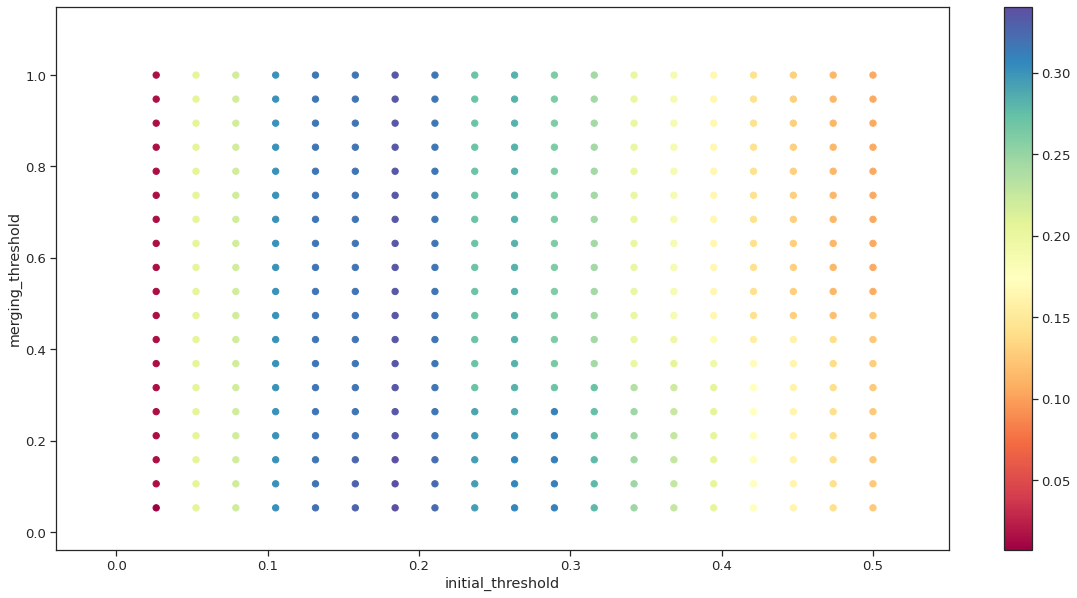

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
points = plt.scatter(df['initial_threshold'], df['merging_threshold'],
                     c=df['score'], s=40, cmap="Spectral") #set style options

# #set limits
plt.xlim(-0.04, 0.55)
plt.ylim(-0.04, 1.15)

#add a color bar
plt.colorbar(points)
sns.regplot('initial_threshold', 'merging_threshold',  data=df, scatter=False, color=".1", fit_reg=False)